In [7]:
import matplotlib.pyplot as plt
from mini_torch.core.Activations import RelU
from mini_torch.core.linear_layers import Linear
from mini_torch.core.loss_fns import BinaryCrossEntropy
from mini_torch.core.Optimizers import StochasticGradientDescent
from mini_torch.core import Functional
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler 
import numpy as np


X, y = make_moons(n_samples=500, noise=0.1)
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

X_tensor,y_tensor = torch.FloatTensor(X), torch.FloatTensor(y)


In [8]:
# Define our model
model = nn.Sequential(Linear(input=2, output=100), RelU(),
                      Linear(100, 100),Linear(100, output=1))

# custom Criterion
criterion = BinaryCrossEntropy()
# custom Optimizer
optimizer = StochasticGradientDescent(model.parameters(), lr=0.01)

# Training Loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_tensor).squeeze()  # Remove extra dimensions
    loss = criterion(torch.sigmoid(outputs), y_tensor)  # Use sigmoid for output probability
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [100/2000], Loss: 0.2175
Epoch [200/2000], Loss: 0.1887
Epoch [300/2000], Loss: 0.1606
Epoch [400/2000], Loss: 0.1358
Epoch [500/2000], Loss: 0.1146
Epoch [600/2000], Loss: 0.0966
Epoch [700/2000], Loss: 0.0819
Epoch [800/2000], Loss: 0.0702
Epoch [900/2000], Loss: 0.0609
Epoch [1000/2000], Loss: 0.0536
Epoch [1100/2000], Loss: 0.0478
Epoch [1200/2000], Loss: 0.0431
Epoch [1300/2000], Loss: 0.0393
Epoch [1400/2000], Loss: 0.0362
Epoch [1500/2000], Loss: 0.0336
Epoch [1600/2000], Loss: 0.0314
Epoch [1700/2000], Loss: 0.0295
Epoch [1800/2000], Loss: 0.0279
Epoch [1900/2000], Loss: 0.0265
Epoch [2000/2000], Loss: 0.0253


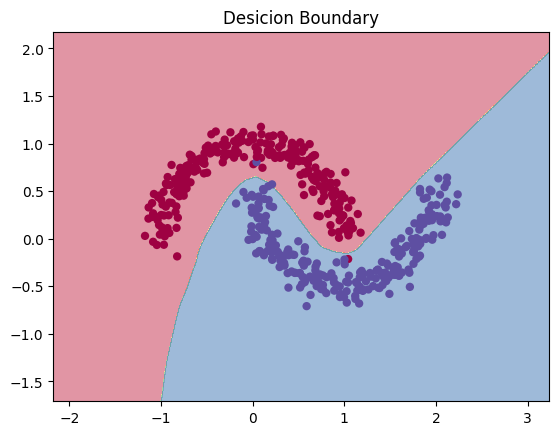

In [9]:
# Visualization of decision boundary
def plot_decision_boundary(dataset, labels, model, steps = 1000,color_map=plt.cm.Spectral):
    # Define region of interest by data limits
    xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    model.eval()
    labels_predicted = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())

    # Plot decision boundary in region of interest
    labels_predicted = [0 if value <= 0.5 else 1 for value in labels_predicted.detach().numpy()]
    z = np.array(labels_predicted).reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=color_map, alpha=0.5)
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels.reshape(labels.size()[0]), cmap=color_map, lw=0)
    plt.title("Desicion Boundary")
    plt.show()

plot_decision_boundary(X_tensor, y_tensor, model=model, steps= 1000) 